In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3


In [5]:
# Set the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Construct the path to the data file
data_file_path = os.path.join(project_root,  'data/raw/NPHA-doctor-visits_version1.csv')

# Load the data into a DataFrame
df = pd.read_csv(data_file_path)


In [6]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [11]:
# Checking for any missing values in the dataset
missing_values = df.isnull().sum()

# Displaying the count of missing values per column
missing_values


Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

In [12]:
# Renaming the column to correct the typo
df = df.rename(columns={"Phyiscal Health": "Physical Health"})

# Displaying the data types of each column
df.dtypes


Number of Doctors Visited                     int64
Age                                           int64
Physical Health                               int64
Mental Health                                 int64
Dental Health                                 int64
Employment                                    int64
Stress Keeps Patient from Sleeping            int64
Medication Keeps Patient from Sleeping        int64
Pain Keeps Patient from Sleeping              int64
Bathroom Needs Keeps Patient from Sleeping    int64
Uknown Keeps Patient from Sleeping            int64
Trouble Sleeping                              int64
Prescription Sleep Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object

In [8]:
# Generating descriptive statistics for the dataset
descriptive_stats = df.describe()

descriptive_stats


,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Computing the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

42

In [15]:
# Ensure consistency in the binary columns
binary_columns = [
    'Stress Keeps Patient from Sleeping', 'Medication Keeps Patient from Sleeping',
    'Pain Keeps Patient from Sleeping', 'Bathroom Needs Keeps Patient from Sleeping',
    'Uknown Keeps Patient from Sleeping'
]
binary_check = {col: df[col].unique() for col in binary_columns}

In [16]:
binary_check

{'Stress Keeps Patient from Sleeping': array([0, 1]),
 'Medication Keeps Patient from Sleeping': array([0, 1]),
 'Pain Keeps Patient from Sleeping': array([0, 1]),
 'Bathroom Needs Keeps Patient from Sleeping': array([0, 1]),
 'Uknown Keeps Patient from Sleeping': array([1, 0])}

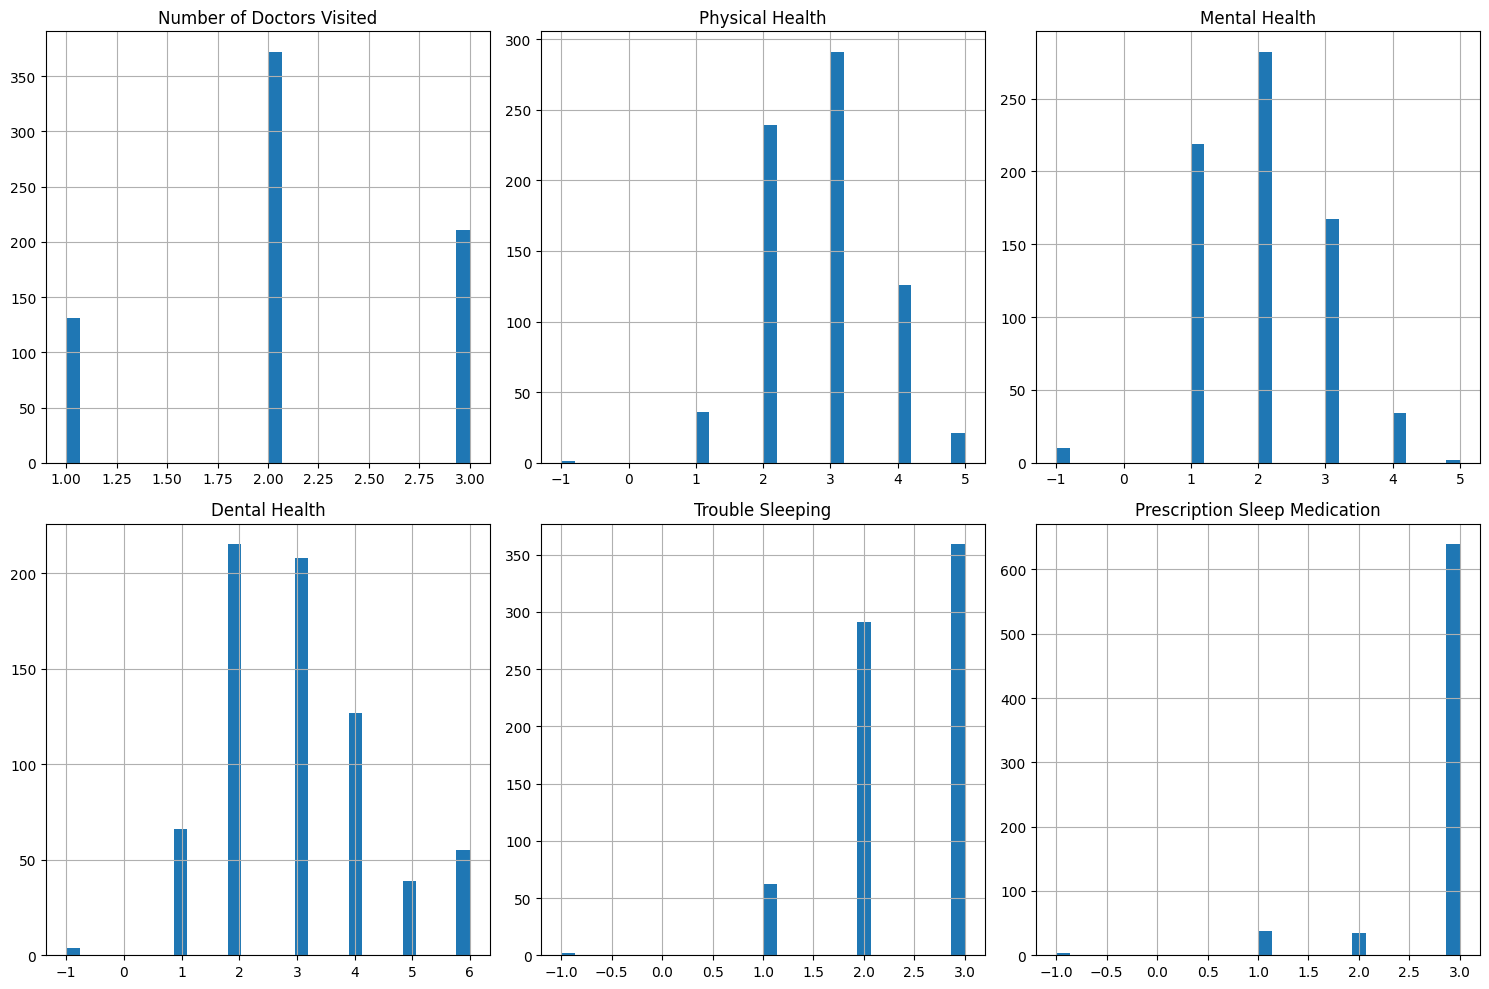

In [17]:
# Numeric features
numeric_features = [
    'Number of Doctors Visited', 'Physical Health', 'Mental Health', 'Dental Health',
    'Trouble Sleeping', 'Prescription Sleep Medication'
]

# Plot histograms for numeric features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    df[feature].hist(bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after_cleaning = df_cleaned.duplicated().sum()

# Display the first few rows of the cleaned dataset
df_cleaned.head(), duplicates_after_cleaning
